In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk

import sys
import random
import math
from ast import literal_eval
import datetime
import algo
import log

In [14]:
logger =  log.Logger().get_logger("INFO", "clustering_main_log")

my_w = tk.Tk()

def upload_file():
    f_types = [('Jpg Files', '*.jpg'),
    ('PNG Files','*.png'),('Jpeg Files', '*.jpeg')]   # type of files to select 
    filename = tk.filedialog.askopenfilename(multiple=True,filetypes=f_types)
    
    for f in filename:
        img=Image.open(f) # read the image file
        img=img.resize((100,100)) # new width & height
        my_w.destroy()
        logger.info("Filename:" + str(f))
        return img
        
#my_w.mainloop()  # Keep the window open

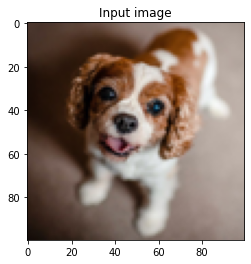

In [15]:
image = upload_file()
imgKM = np.array(image)
#imgKM = cv2.cvtColor(imgKM,cv2.COLOR_BGR2RGB)
##reshape the 2D image "imgKM" into a 2D array with 3 columns and the number of rows inferred from the length of the array.
vectorized = imgKM.reshape((-1,3))
vectorized = np.float32(vectorized)

x, y = image.size
x2, y2 = math.floor(100), math.floor(100)
image = image.resize((x2,y2),Image.ANTIALIAS)

pixels = image.load()
width, height = image.size
w,h = image.size
plt.title('Input image')
plt.imshow(image)

#Map pixel values to vectors
vector_list = []
for y in range(height):
    vector_list.append([])
    for x in range(width):
        vector_list[y].append(list(pixels[x,y]))

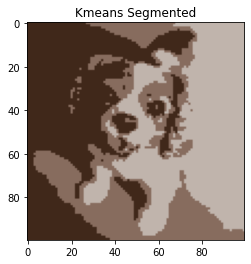

In [16]:
k = algo.KMeans(K = 3, max_iters = 100)  

def predict_funct(k,vectorized):
    y_pred = k.predict( vectorized ) 
    k.cent()
    centers = np.uint8(k.cent())
    y_pred = y_pred.astype(int)
    #np.unique(y_pred)
    labels = y_pred.flatten()
    segmented_image = centers[labels.flatten()]
    #create a new array segmented_image which contains the mean feature vector of each cluster for the sample that belongs to that cluster.
    segmented_image = segmented_image.reshape(imgKM.shape)
    return segmented_image

    
segmented_img = predict_funct( k, vectorized )
KMtime = datetime.datetime.now()
logger.info("Kmeans completed at :" + str(KMtime))
plt.title('Kmeans'+' Segmented')
plt.imshow(segmented_img)
plt.show()

In [9]:
d = algo.dbscan(vector_list, minpts=10, epsilon=5) 


In [10]:
#reads vector array and generates an image
def createImage(vectors: list):
    vecLen = len(vectors[0][0])
    #Check supported model and initialize image
    if vecLen == 3:
        image = Image.new('RGB', (len(vectors[0]),len(vectors)))
    elif vecLen == 4:
        image = Image.new('RGBA', (len(vectors[0]),len(vectors)))
    else:
        print("Unsupported model")
        sys.exit(1)

    #Map array values to image
    pixel = image.load()
    for y in range(len(vectors)):
        for x in range(len(vectors[0])):
            r = int(round(vectors[y][x][0]))
            g = int(round(vectors[y][x][1]))
            b = int(round(vectors[y][x][2]))
            if vecLen == 3:
                pixel[x,y] = (r,g,b)
            elif vecLen == 4:
                a = int(round(vectors[y][x][3]))
                pixel[x,y] = (r,g,b,a)        
    return image

# Display the clustered image:

def Display(Image,Alg):
    %matplotlib inline
    plt.title(Alg+' Segmented')
    plt.imshow(np.asarray(Image))
    DBtime = datetime.datetime.now()
    logger.info("DBScan completed at :" + str(DBtime))

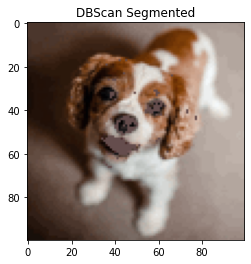

In [11]:
Display(createImage(d),"DBScan")